## Final Project Submission

Please fill out:
* Student name: Matthew Karani 
* Student pace: Full Time Hybrid
* Scheduled project review date/time: 26th July 2024
* Instructor name: Antonny Muiko
* Blog post URL:


# Project Overview.

This project will use exploratory data analysis to generate insights for the Movie Director at Elimu Kwa Wote as to how they can start a new movie studio within their organization. 

# Business Problem 

Elimu Kwa Wote(EKW) is a non-profit educational institution whose goal is to educate all people about the word of God. As a start the founders have been spreading this life giving message through songs, community outreach and skits. Recently it was suggested in one of their board meetings that EKW should tap into the movie industry to spread the message of God's love through thrilling , entertaining and mind boggling movies. One of the core values of Elimu Kwa Wote is Lifelong Learning. So it was established that before embarking on the process of creating bible based educational movies, an analysis of the movie industry should be done to establish the main movie genres that most people are watching. With the analyis results,the Elimu Kwa Wote movie committee will be able to pick out themes and stories in the bible that speak of topics and issues that are present in the world today and turn them into soul captivating stories so as to spread the life giving message of God's love to the world enjoyably and memorably.

## Objectives

1. Determine the most popular movie genres. 

2. Determine the average length of movies for the most popular genre of choice. 
jjjj
3. Identify the top grossing movies among the most popular genre of choice for later further analysis

# Data Understanding

The data that has been used to generate the insights comes from the following sources :
- *[IMDB](https://www.imdb.com)*
- *[TheMovieDB](https://www.themoviedb.org/)*
- *[The Numbers](https://www.the-numbers.com)*

The features present in these data sources that are useful for the analysis include : 
- *Movie Title*
- *Genre*
- *Production Budget*
- *Domestic Gross*
- *Worldwide Gross*
- *Average Rating*
- *Release Date*
- *Runtime*
- *Popularity*
- *Vote Average*
- *Vote Count*

# Data Preparation

## Clean the data

In [588]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import local_functions as lf 
from local_functions import map_genre_ids
import ast

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud

# For interactive scatter plots
import plotly.express as px



# Set display format for float 
pd.set_option('display.float_format', '{:.2f}'.format)

In [589]:
# Read the databases

# TheMovieDB(TMDB)
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')


# The Numbers(TN)
the_numbers_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


# IMDB 
# Establish the connection to the database 
conn = sqlite3.connect('unzipped_data/im.db')
cursor = conn.cursor()


### The MovieDB

In [590]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [591]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [592]:
tmdb_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00,26517.00,26517.00,26517.00,26517.00
mean,13258.00,295050.15,3.13,5.99,194.22
std,7654.94,153661.62,4.36,1.85,960.96
min,0.00,27.00,0.60,0.00,1.00
25%,6629.00,157851.00,0.60,5.00,2.00
50%,13258.00,309581.00,1.37,6.00,5.00
75%,19887.00,419542.00,3.69,7.00,28.00
max,26516.00,608444.00,80.77,10.00,22186.00


In [593]:
# Convert Release_date object to a date_time object
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [594]:
# Drop columns
tmdb_df.drop(columns=['Unnamed: 0', 'id','original_language'], inplace=True)
tmdb_df.head()

,genre_ids,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",Inception,27.92,2010-07-16,Inception,8.30,22186


## Feature Engineering

### Create the genre_names feature

The Code below has been encapsulated to simplify the workflow on this page. The breakdown of the functions is found in the local_function.py script.

In [595]:
# Map genre id's to the actual genre names
api_key = lf.my_api_key
genre_dict = lf.get_genre_names(api_key)
print(f"The mapping of the genre id's to their names is a follows : {genre_dict}")

The mapping of the genre id's to their names is a follows : {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [596]:
# Create the genre_names column
# merged_movie_df['genre_names'] = merged_movie_df['genre_ids'].apply(lambda x: map_genre_ids(x))


tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda x: map_genre_ids(x,genre_dict) )
display(tmdb_df)

,genre_ids,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,"[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]",How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,"[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]",Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,"[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]",Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,"[Animation, Comedy, Family]"
4,"[28, 878, 12]",Inception,27.92,2010-07-16,Inception,8.30,22186,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1,"[Horror, Drama]"
26513,"[18, 53]",_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1,"[Drama, Thriller]"
26514,"[14, 28, 12]",The Last One,0.60,2018-10-01,The Last One,0.00,1,"[Fantasy, Action, Adventure]"
26515,"[10751, 12, 28]",Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1,"[Family, Adventure, Action]"


In [597]:
# Drop the genre_ids column. 
tmdb_df.drop(columns=['genre_ids'], inplace=True)



In [598]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  26517 non-null  object        
 1   popularity      26517 non-null  float64       
 2   release_date    26517 non-null  datetime64[ns]
 3   title           26517 non-null  object        
 4   vote_average    26517 non-null  float64       
 5   vote_count      26517 non-null  int64         
 6   genre_names     26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [599]:
# drop duplicates
df = tmdb_df.drop_duplicates(subset='original_title', keep='first')

tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  26517 non-null  object        
 1   popularity      26517 non-null  float64       
 2   release_date    26517 non-null  datetime64[ns]
 3   title           26517 non-null  object        
 4   vote_average    26517 non-null  float64       
 5   vote_count      26517 non-null  int64         
 6   genre_names     26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.4+ MB


Currently the genre names column is a list . The code below will convert the column from being a list to a string for easier manipulation.

In [600]:
tmdb_df['genre_names'] = tmdb_df['genre_names'].apply(lambda x:','.join(x) if isinstance(x, list) else x)

In [601]:
# Display the updated dataframe
display(tmdb_df)

,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,"Adventure,Fantasy,Family"
1,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,"Fantasy,Adventure,Animation,Family"
2,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,"Adventure,Action,Science Fiction"
3,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,"Animation,Comedy,Family"
4,Inception,27.92,2010-07-16,Inception,8.30,22186,"Action,Science Fiction,Adventure"
...,...,...,...,...,...,...,...
26512,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1,"Horror,Drama"
26513,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1,"Drama,Thriller"
26514,The Last One,0.60,2018-10-01,The Last One,0.00,1,"Fantasy,Action,Adventure"
26515,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1,"Family,Adventure,Action"


### Creating the release month feature

In [602]:
# Create a new column 'Release Month' with the month component extracted
tmdb_df['release_month'] = tmdb_df['release_date'].dt.month

### The Numbers DB

In [603]:
the_numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [604]:
the_numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are no null values present in this dataset.

In [605]:
the_numbers_df.describe()

,id
count,5782.00
mean,50.37
std,28.82
min,1.00
25%,25.00
50%,50.00
75%,75.00
max,100.00


Clean the dataset

In [606]:
# Clean the data
# Production Budget
# Remove Dollar Sign
# Convert the datatype to float 
 
cleaned_tn_df = lf.clean_currency_columns(the_numbers_df, 'production_budget', 'domestic_gross', 'worldwide_gross')


# Convert Release date to date-time format
cleaned_tn_df['release_date'] = pd.to_datetime(cleaned_tn_df['release_date'])

# Display cleaned dataset
display(cleaned_tn_df)

display(cleaned_tn_df.info())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


None

### Add a genre column corresponding to the genre of the current movie name. 

In [607]:
# df_with_genres = lf.update_dataframe_with_genres(cleaned_tn_df, 'movie', batch_size=10, max_retries=5)

# Code run successfully. Due to the lenghth of time taken to run it the code has been commented out. 

In [608]:
# Save the numbers dataframe with Genre column to a CSV file
# df_with_genres.to_csv('tn_movie_info_with_genres.csv', index = False)

# The new dataframe has been created saved to the root directory , thus there is no need to
# run it again. 

In [609]:
# Read the newly created tn_movie_info_with_genres_csv_file
updated_tn_df = pd.read_csv('tn_movie_info_with_genres.csv')

# Display the columns in the dataframe as well 
display(updated_tn_df)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Genre
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,"['Action', 'Adventure', 'Fantasy']"
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,"['Action', 'Adventure', 'Sci-Fi']"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,"['Action', 'Adventure', 'Sci-Fi']"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00,"['Horror', 'Mystery', 'Sci-Fi', 'Thriller']"
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00,"['Mystery', 'Thriller']"
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00,"['Documentary', 'War']"
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00,"['Drama', 'Horror', 'Thriller']"


In [610]:
# Display the info() of the updated_tn_df
print(updated_tn_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   Genre              5763 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 316.3+ KB
None


#### Create a return on investments column

In [611]:
# Create ROI column
updated_tn_df['ROI'] = updated_tn_df['worldwide_gross'] - updated_tn_df['production_budget']

# display the new dataframe
display(updated_tn_df)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Genre,ROI
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2351345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,"['Action', 'Adventure', 'Fantasy']",635063875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,"['Action', 'Adventure', 'Sci-Fi']",-200237650.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,"['Action', 'Adventure', 'Sci-Fi']",1072413963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",999721747.00
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00,"['Horror', 'Mystery', 'Sci-Fi', 'Thriller']",-7000.00
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00,"['Mystery', 'Thriller']",234495.00
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00,"['Documentary', 'War']",-3662.00
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00,"['Drama', 'Horror', 'Thriller']",-1400.00


In [612]:

# Check for the data types in the Genre column
print("\nData types in the Genre column:")
print(updated_tn_df['Genre'].apply(lambda x: type(x)).value_counts())




Data types in the Genre column:
Genre
<class 'str'>      5763
<class 'float'>      19
Name: count, dtype: int64


#### Converting the genre column into a 'proper string', currently , it is a string that resembles python lists

In [613]:
# Convert the string representation of lists into actual lists then to 
#  strings
# Function to safely evaluate the string as a list and join the elements
def safe_literal_eval(genre_str):
    try:
        # Attempt to evaluate the string as a list and join the elements
        genres_list = ast.literal_eval(genre_str)
        return ', '.join(genres_list) if isinstance(genres_list, list) else genre_str
    except (ValueError, SyntaxError):
        # If the evaluation fails, return the original string or handle it appropriately
        return genre_str

# Apply the conversion function to the Genre column
updated_tn_df['Genre'] = updated_tn_df['Genre'].apply(safe_literal_eval)

# dispay the updated dataframe
display(updated_tn_df)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Genre,ROI
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,"Action, Adventure, Fantasy, Sci-Fi",2351345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,"Action, Adventure, Fantasy",635063875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,"Action, Adventure, Sci-Fi",-200237650.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,"Action, Adventure, Sci-Fi",1072413963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,"Action, Adventure, Fantasy, Sci-Fi",999721747.00
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00,"Horror, Mystery, Sci-Fi, Thriller",-7000.00
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00,"Mystery, Thriller",234495.00
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00,"Documentary, War",-3662.00
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00,"Drama, Horror, Thriller",-1400.00


### IMDB

In [614]:
# read all tables in the database
querry = """
SELECT *
FROM sqlite_master
"""

tables = pd.read_sql(querry,conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


For the purposes of this analysis , only the movie_basics table and the movie_ratings table will be analysed from the IMDB tables

- #### Movie Basics Table

In [615]:
# Read the movie_basics table
querry = """
SELECT * 
FROM movie_basics
"""
movie_basics_df = pd.read_sql(querry, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [616]:
# Check Column count and data_types
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [617]:
# Obtain statistical data.
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.00,114405.00
mean,2014.62,86.19
std,2.73,166.36
min,2010.00,1.00
25%,2012.00,70.00
50%,2015.00,87.00
75%,2017.00,99.00
max,2115.00,51420.00


In [618]:
# Drop Unnecessary columns 
movie_basics_df.drop('original_title',axis = 1 ,inplace=True)


In [619]:
# Check for null values
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [620]:
# Drop columns with null" genres
movie_basics_df.dropna(subset=['genres'] , inplace= True)
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140736 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   start_year       140736 non-null  int64  
 3   runtime_minutes  112233 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


From the above analysis the runtime minutes column has 28,503 null rows.

Below we will fill the null runtime minutes with the average runtime minutes for the specific combination of movie genres.

## Fill null runtime minutes values

In [621]:
# Calculate the average runtime for each unique genre combination.
genre_runtime_avg = movie_basics_df.groupby('genres')['runtime_minutes'].mean()

print(genre_runtime_avg)

genres
Action                       102.43
Action,Adult,Comedy           71.00
Action,Adventure              99.59
Action,Adventure,Animation    91.50
Action,Adventure,Biography    83.07
                              ...  
Thriller,War,Western          55.00
Thriller,Western              95.00
War                           93.92
War,Western                  138.00
Western                       89.79
Name: runtime_minutes, Length: 1085, dtype: float64


In [622]:
# Mapping genres to their runtime average i.e creating a 
genre_runtime_avg_series = movie_basics_df['genres'].map(genre_runtime_avg)

print(genre_runtime_avg_series)

"""
Genre runtime series is a 

"""

0        101.57
1        105.95
2         94.90
3         97.00
4         94.04
          ...  
146138      NaN
146139    94.90
146140    74.66
146141    93.28
146143    74.66
Name: genres, Length: 140736, dtype: float64


'\nGenre runtime series is a \n\n'

In [623]:
# Fill null values in runtime_minutes' with genre-specific averages
movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].fillna(genre_runtime_avg_series)

# Check for any more null runtime_minutes values
display(movie_basics_df.isna().sum())

# If any , remove rows with null runtime minutes
movie_basics_df.dropna(subset=['runtime_minutes'], inplace = True)

# display the updated dataframe
display(movie_basics_df)

movie_id            0
primary_title       0
start_year          0
runtime_minutes    57
genres              0
dtype: int64

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,2018,97.00,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146137,tt9916190,Safeguard,2019,90.00,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,74.66,Documentary
146141,tt9916706,Dankyavar Danka,2013,93.28,Comedy


- #### Movie Ratings Table

In [624]:
# Read_movie reviews table
querry = """
SELECT * 
FROM movie_ratings
"""
movie_ratings_df = pd.read_sql(querry, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [625]:
# Check Column count and data_types
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There are no null values in the table

In [626]:
# Obtain statistical data.
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


 - ### Merging the movie basics and movie ratings tables.

In [627]:
imdb_basics_plus_ratings_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner' )
display(imdb_basics_plus_ratings_df)

# Check the info()
imdb_basics_plus_ratings_df.info()
imdb_basics_plus_ratings_df.isnull().sum()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,2018,97.00,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...,...
73038,tt9913056,Swarm Season,2019,86.00,Documentary,6.20,5
73039,tt9913084,Diabolik sono io,2019,75.00,Documentary,6.20,6
73040,tt9914286,Sokagin Çocuklari,2019,98.00,"Drama,Family",8.70,136
73041,tt9914642,Albatross,2017,74.66,Documentary,8.50,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73043 entries, 0 to 73042
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73043 non-null  object 
 1   primary_title    73043 non-null  object 
 2   start_year       73043 non-null  int64  
 3   runtime_minutes  73043 non-null  float64
 4   genres           73043 non-null  object 
 5   averagerating    73043 non-null  float64
 6   numvotes         73043 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

# Analysis


## Obj 1) Most Popular Genre


#### a(1)Popularity based on averagerating and votecount 
i) Using IMDB database


In [628]:
# Order movie by genre.
genre_stats = imdb_basics_plus_ratings_df.groupby('genres').agg(
   mean_rating = ('averagerating', 'mean'),
   sum_votes = ('numvotes', 'sum')
).reset_index()

# Code to calculate the average rating of the movies with the most votes
sorted_genre_means_by_sum_votes = genre_stats.sort_values(by='sum_votes', ascending=False, ignore_index= True)
display("Genre combinations by highest average ratings ordered by the number of votes")
display(sorted_genre_means_by_sum_votes.head(100))


'Genre combinations by highest average ratings ordered by the number of votes'

,genres,mean_rating,sum_votes
0,"Action,Adventure,Sci-Fi",5.66,23023248
1,"Action,Adventure,Fantasy",5.37,9658883
2,"Adventure,Animation,Comedy",5.94,8687435
3,Drama,6.49,8395521
4,"Comedy,Drama,Romance",6.29,7665463
...,...,...,...
95,"Comedy,Fantasy,Romance",5.99,521892
96,"Action,Mystery,Sci-Fi",5.66,513926
97,"Drama,History,Thriller",6.66,504799
98,"Drama,War",6.47,504561


#### Bar Chart showing the average rating of movies with the most number of votes

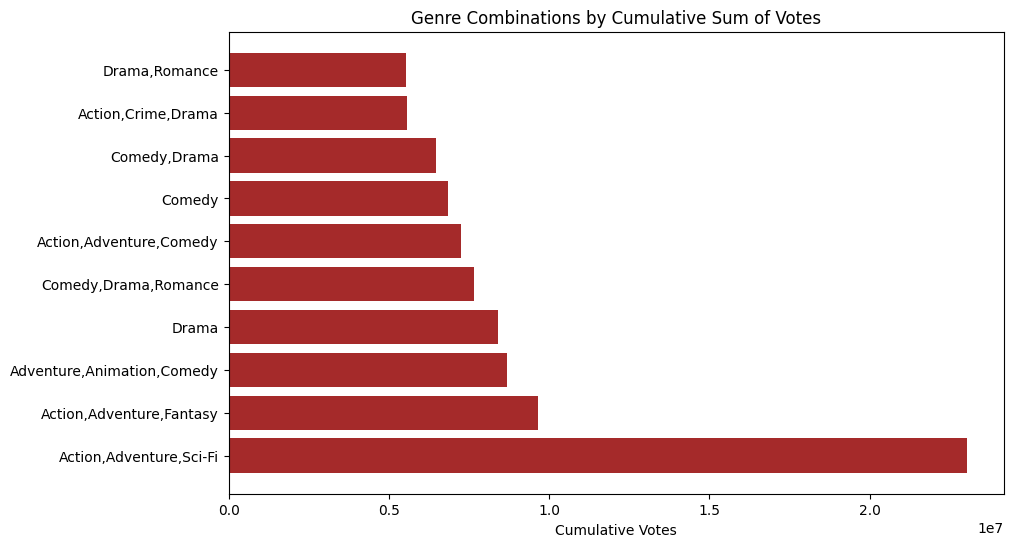

In [629]:
# Top 10 Genres
top_10_genres = sorted_genre_means_by_sum_votes.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_genres['genres'], top_10_genres['sum_votes'], color='brown')
plt.xlabel('Cumulative Votes')
plt.title('Genre Combinations by Cumulative Sum of Votes')
plt.autoscale()
plt.show()


In [630]:
# Sort genres by highest mean rating
sorted_genre_means = genre_stats.sort_values(by='mean_rating', ascending=False, ignore_index= True)
display("Genre combinations by highest average ratings ordered by the mean rating")
display(sorted_genre_means.head(70))


'Genre combinations by highest average ratings ordered by the mean rating'

,genres,mean_rating,sum_votes
0,"Comedy,Documentary,Fantasy",9.40,5
1,"Documentary,Family,Musical",9.30,19
2,Game-Show,9.00,7
3,"Documentary,News,Sport",8.80,25
4,"Documentary,News,Reality-TV",8.80,8
...,...,...,...
65,Music,7.62,23980
66,"Documentary,Drama,War",7.61,2260
67,"Adventure,Documentary,Family",7.60,4207
68,"Animation,Documentary,Music",7.60,63


#### Observation
Genres with the highest ratings e.g Comedy|Documentary|Fantasy with a rating of 9.40 are likely to be outliers because of their low vote counts. 
This might suggest that they are have a small audience who enjoy them.

### Genres with both high ratings and high number of voters given a threshold of a rating of 6 and minimum votes as 1 Million

In [631]:
# Define the thresholds
min_rating = 6
min_votes = 1_000_000

# Filter the dataframe based on the above conditions.
filtered_genres_using_threshhold = genre_stats[(genre_stats['mean_rating'] >= min_rating) & (genre_stats['sum_votes'] >= min_votes)]

# Sort genres by highest mean rating
sorted_filtered_genres = filtered_genres_using_threshhold.sort_values(by='mean_rating', ascending=False, ignore_index=True)

# Display the top 10 combinations
print("Genre combinations by highest average ratings ordered by the mean rating")
display(sorted_filtered_genres.head(70))


Genre combinations by highest average ratings ordered by the mean rating


,genres,mean_rating,sum_votes
0,Documentary,7.29,1785513
1,"Biography,Comedy,Drama",6.97,2418463
2,"Action,Biography,Drama",6.84,1510436
3,"Biography,Drama,Sport",6.83,1432227
4,"Biography,Drama,History",6.79,3502843
5,"Biography,Crime,Drama",6.67,2491084
6,"Biography,Drama,Romance",6.61,1017498
7,"Biography,Drama",6.60,2694678
8,"Action,Adventure,Animation",6.56,3570543
9,"Action,Drama,History",6.53,1124245


### Scatter plot showing the distribution of averagerating against number of voters

In [632]:
# An interactive scatter plot with plotly to include tool tips

# Create scatter plot with Plottly
fig = px.scatter(
    genre_stats,
    x='sum_votes',
    y='mean_rating',
    color='genres',
    hover_data={'sum_votes':True, 'mean_rating':True,'genres':True},
    labels={'sum_votes': 'Number of Votes' , 'mean_rating':'Average Rating','genres':'Genre' },
    title = 'Scatter Plot of Average Rating vs. Number of votes by Genre'
)

# Customize layout for better interactivity
fig.update_layout(
    legend_title='Genres',
    legend=dict(
        x=1.05,  # Position the legend outside the plot area
        y=1,
        traceorder='normal',
        orientation='v'
    ),
    xaxis_title='Sum of Votes',
    yaxis_title='Mean Rating',
      updatemenus=[{
        'buttons': [
            {
                'args': [{'xaxis.autorange': True, 'yaxis.autorange': True}],
                'label': 'Reset Zoom',
                'method': 'relayout'
            }
        ],
        'direction': 'down',
        'pad': {'r': 10, 't': 10},
        'showactive': True,
        'type': 'buttons',
        'x': 0.17,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'top'
    }]
)

# Show the plot
fig.show()

##### Observations
1) The most popular movies by number of voters have an average rating between 5 and 6

2) Movies with the highest average ratings i.e 10 have few voters meaning that they are not as popular.

3) The top ranking genre combination in terms of number of voters(translated to viewers) is Action|Adventure|Sci-fi with a whooping 23 Million plus no of voters.

4) Given a threshold of 1 Million voters and a min average rating of 6 Documentaries come in 1st with an average cumulative rating of 7.29

#### a(2)Popularity based on averagerating and votecount 
Using TMDB dataset


Getting the mean rating for each genre as well as the vote count total

In [633]:
tmdb_genre_aggs = tmdb_df.groupby('genre_names').agg(
    avg_rating = ('vote_average', 'mean'),
    sum_vote_count=('vote_count', 'sum')
).reset_index()

# Sort by average rating in descending order. 
sorted_by_rating = tmdb_genre_aggs.sort_values(by='avg_rating', ascending=False,ignore_index=True )

# Display the dataframe
display(sorted_by_rating.head())

,genre_names,avg_rating,sum_vote_count
0,"Drama,Fantasy,Family,Mystery",10.00,2
1,"Drama,Thriller,Mystery,Romance,Crime",10.00,2
2,"Documentary,Music,Science Fiction",10.00,1
3,"Drama,Western,Music",10.00,1
4,"Music,Animation,Horror",10.00,1


In [634]:
# Sort by vote_count in descending order. 
sorted_by_rating = tmdb_genre_aggs.sort_values(by='sum_vote_count', ascending=False,ignore_index=True )

# Display the dataframe
display(sorted_by_rating.head(10))

,genre_names,avg_rating,sum_vote_count
0,Drama,6.25,239729
1,Comedy,5.91,179853
2,"Action,Adventure,Science Fiction",5.97,156925
3,"Horror,Thriller",4.83,101011
4,"Drama,Romance",6.15,94029
5,"Action,Adventure,Fantasy,Science Fiction",6.88,93405
6,"Comedy,Drama",6.28,90053
7,"Drama,History",6.56,73094
8,"Action,Adventure,Fantasy",5.41,72114
9,"Drama,Thriller",5.92,64813


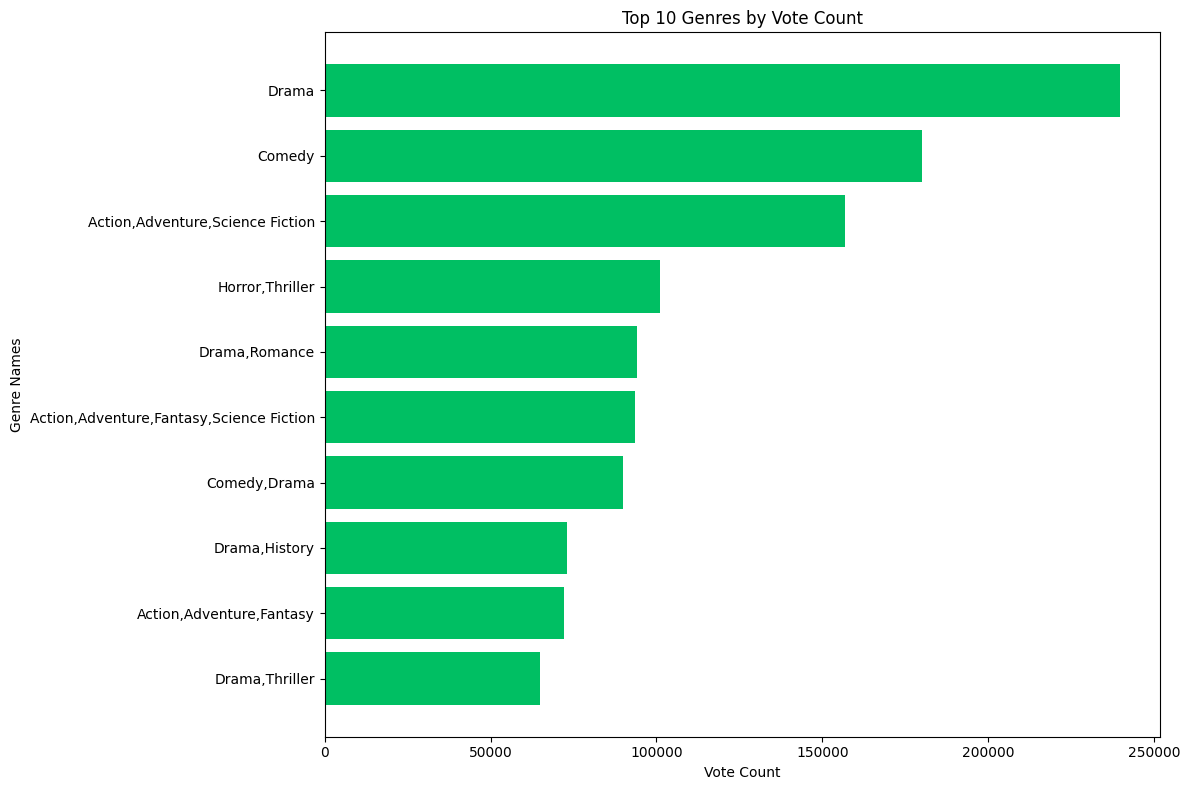

In [666]:
# A bar graph showing the above statistics
import matplotlib.pyplot as plt

# Assuming 'sorted_by_rating' is your DataFrame
top_10_genres = sorted_by_rating.head(10)

## Create a horizontal bar plot using Matplotlib
plt.figure(figsize=(12, 8))
plt.barh(top_10_genres['genre_names'], top_10_genres['sum_vote_count'], color='#00bf63')
plt.xlabel('Vote Count')
plt.ylabel('Genre Names')
plt.title('Top 10 Genres by Vote Count')
plt.gca().invert_yaxis()  # Optional: Invert y-axis to have the highest values at the top
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Below we will create a threshold to allow us to find the genres with high average ratings and high vote counts

In [635]:
# threshold 
tmdb_min_votes = 7
tmdb_min_count = 80_000

# Apply the thresholds
thresholded_genre_aggs =tmdb_genre_aggs[
     (tmdb_genre_aggs['avg_rating'] >= min_rating) & 
     (tmdb_genre_aggs['sum_vote_count'] >= tmdb_min_count )
]


In [636]:
# Sort by average rating in descending order.
tmdb_thresh_sorted_by_rating = thresholded_genre_aggs.sort_values(by='avg_rating',ascending=False,ignore_index=True)

# Show the dataframe
display(tmdb_thresh_sorted_by_rating.head(90))

,genre_names,avg_rating,sum_vote_count
0,"Action,Adventure,Fantasy,Science Fiction",6.88,93405
1,"Comedy,Drama",6.28,90053
2,Drama,6.25,239729
3,"Drama,Romance",6.15,94029


In [637]:
# Sort by sum of vote count in descending order.
tmdb_thresh_sorted_by_vote_count = thresholded_genre_aggs.sort_values(by='sum_vote_count',ascending=False,ignore_index=True)

# Show the dataframe
display(tmdb_thresh_sorted_by_vote_count)

,genre_names,avg_rating,sum_vote_count
0,Drama,6.25,239729
1,"Drama,Romance",6.15,94029
2,"Action,Adventure,Fantasy,Science Fiction",6.88,93405
3,"Comedy,Drama",6.28,90053


### A scatter plot showing the average rating against sum of voter count

In [638]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    tmdb_genre_aggs,
    x='sum_vote_count',
    y='avg_rating',
    color='genre_names',
    hover_data={'sum_vote_count': True, 'avg_rating': True, 'genre_names': True},
    labels={'sum_vote_count': 'Number of Votes', 'avg_rating': 'Average Rating', 'genre_names': 'Genre'},
    title='Scatter Plot of Average Rating vs. Number of Votes by Genre'
)

# Customize layout for better interactivity
fig.update_layout(
    legend_title='Genres',
    legend=dict(
        x=1.05,  # Position the legend outside the plot area
        y=1,
        traceorder='normal',
        orientation='v'
    ),
    xaxis_title='Sum of Votes',
    yaxis_title='Mean Rating',
    xaxis=dict(
        title='Sum of Votes',
        range=[0, tmdb_genre_aggs['sum_vote_count'].max() * 1.1]  # Set range with some padding
    ),
    yaxis=dict(
        title='Mean Rating',
        range=[0, 10]  # Set range, assuming rating is between 0 and 10
    )
)

# Show the plot
fig.show()


#### Observations.
1. For the TMDB dataset, drama is the most popular genre this is based on the fact that it has the largest vote count with an average rating of 6.25.
2. Genres with very high ratings of 8 and above and very low ratings of 0 to 1
are not quite popular as they have a low vote count.
3. The top genres/genre combinations based on vote count include
   - i) Drama
   - ii) Comedy
   - iii) Action, Adventure , Science Fiction
   - iv) Horror, Thriller
   - v) Drama,Romance
- Possible recommendation - Focus on the above listed top 5 genres. 

#### b) Popularity based on popularity index

(Using TMDB database)

In [639]:
# get the average popularity per genre
avg_tmdb_popularity = tmdb_df.groupby('genre_names').agg(
    popularity_avg = ('popularity','mean'),
    movie_count = ('original_title', 'count')

).reset_index()

# Sort the genres based on popularity
genre_average_by_Popularity = avg_tmdb_popularity.sort_values(by='popularity_avg', ascending=False, ignore_index=True)

# Display the dataframe
display(genre_average_by_Popularity.head(30))

,genre_names,popularity_avg,movie_count
0,"Action,Adventure,Animation,Science Fiction,Comedy",60.53,1
1,"Family,Animation,Comedy,Fantasy,Adventure",48.06,1
2,"Action,Adventure,Science Fiction,Comedy",44.73,1
3,"Action,Mystery,Science Fiction,Thriller",36.95,1
4,"Adventure,Family,Animation,Action,Comedy",36.92,2
5,"Fantasy,Adventure,Science Fiction,Action",34.29,2
6,"Science Fiction,Adventure,Thriller",33.84,1
7,"History,Drama,Thriller,War",33.08,1
8,"Action,Adventure,Comedy,Fantasy",31.92,4
9,"Family,Fantasy,Romance",31.79,1


In [640]:
# Filter out the genres with at least 50 movies. 
genre_counts = tmdb_df['genre_names'].value_counts()

# Filter genres with at least 50 movies.
valid_genres = genre_counts[genre_counts >= 50].index

# Filter the original Dataframe to include only these genres
filtered_tmdb_df = tmdb_df[tmdb_df['genre_names'].isin(valid_genres)]

# Filter the dataframe based on the vote_count threshold. 
filtered_vote_count_tmdb_df = tmdb_df[tmdb_df['vote_count'] >= 1000]

# Calculate the correlation between vote average and popularity
correlation = filtered_vote_count_tmdb_df [filtered_vote_count_tmdb_df['vote_count'] >= 1000][['vote_average','popularity']].corr().loc['vote_average','popularity']

print(f"""The correlation between vote average and popularity for popular genres given
       the thresholds of at least a vote count of 1000 
      and at least 50 movies with the same genre is: {correlation:.2f}""")

The correlation between vote average and popularity for popular genres given
       the thresholds of at least a vote count of 1000 
      and at least 50 movies with the same genre is: 0.24


### Observation
The above correlation index of 0.24 indicates a weak positive correlation between vote average and popularity. This means that as the vote average increases, there is a slight increase in popularity, but it is negligible.

#### Scatter plot to show the correlation between vote average and popularity

In [641]:
import plotly.express as px

print("Hover over the point to for more details ")

# Create a scatter plot with a regression line
fig = px.scatter(
    filtered_vote_count_tmdb_df,
    x='vote_average',
    y='popularity',
    trendline='ols',  # Ordinary Least Squares regression line
     hover_data={
        'original_title': True,
        'vote_average': True, 
        'popularity': True,  
        'genre_names':True
    },
    title='Correlation between Vote Average and Popularity',
    labels={'original_title':'Movie Title','vote_average': 'Vote Average', 'popularity': 'Popularity', 'genre_names':'Genre(s)'}
)


# Show the plot
fig.show()


# Print the number of movies
print(f"There are {filtered_vote_count_tmdb_df.shape[0]} movies in this dataframe.")


Hover over the point to for more details 


There are 1108 movies in this dataframe.



#### c) Popularity based on ROI
(Using the numbers database)

In [642]:
display(updated_tn_df)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Genre,ROI
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,"Action, Adventure, Fantasy, Sci-Fi",2351345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,"Action, Adventure, Fantasy",635063875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,"Action, Adventure, Sci-Fi",-200237650.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,"Action, Adventure, Sci-Fi",1072413963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,"Action, Adventure, Fantasy, Sci-Fi",999721747.00
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00,"Horror, Mystery, Sci-Fi, Thriller",-7000.00
5778,79,1999-04-02,Following,6000.00,48482.00,240495.00,"Mystery, Thriller",234495.00
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00,"Documentary, War",-3662.00
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00,"Drama, Horror, Thriller",-1400.00


In [643]:
updated_tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   Genre              5763 non-null   object 
 7   ROI                5782 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 361.5+ KB


In [644]:

# Ensure the 'ROI' column is treated as a numeric type
updated_tn_df['ROI'] = updated_tn_df['ROI'].astype(float)

# Add commas and remove decimals
updated_tn_df['Formatted ROI'] = updated_tn_df['ROI'].apply(lambda x: "{:,.0f}".format(x))

# filter ROI by genre & calculate the cumulative ROI
genre_roi_df = updated_tn_df.groupby('Genre').agg(
    cumulative_roi = ('ROI', 'sum'),
    movie_count = ('movie','count')
    ).reset_index()

# Order by cumulative ROI
sorted_genre_roi = genre_roi_df.sort_values(by='cumulative_roi', ascending=False, ignore_index=True)

# display the df
display(sorted_genre_roi.head(30))


,Genre,cumulative_roi,movie_count
0,"Action, Adventure, Sci-Fi",25374541495.00,79
1,"Action, Adventure, Thriller",11744802222.00,61
2,"Action, Adventure, Fantasy, Sci-Fi",10686373058.00,23
3,"Action, Adventure, Sci-Fi, Thriller",10012993325.00,50
4,"Comedy, Drama, Romance",8289904914.00,244
5,"Comedy, Romance",8264505106.00,160
6,Comedy,7939205078.00,204
7,"Animation, Adventure, Comedy, Family, Fantasy",7652101629.00,36
8,"Action, Crime, Thriller",7626597471.00,91
9,"Animation, Adventure, Comedy, Family",6572711143.00,25


#### Standard normal curve based on ROI

## Most profitable genre (Visualize using pie chart)

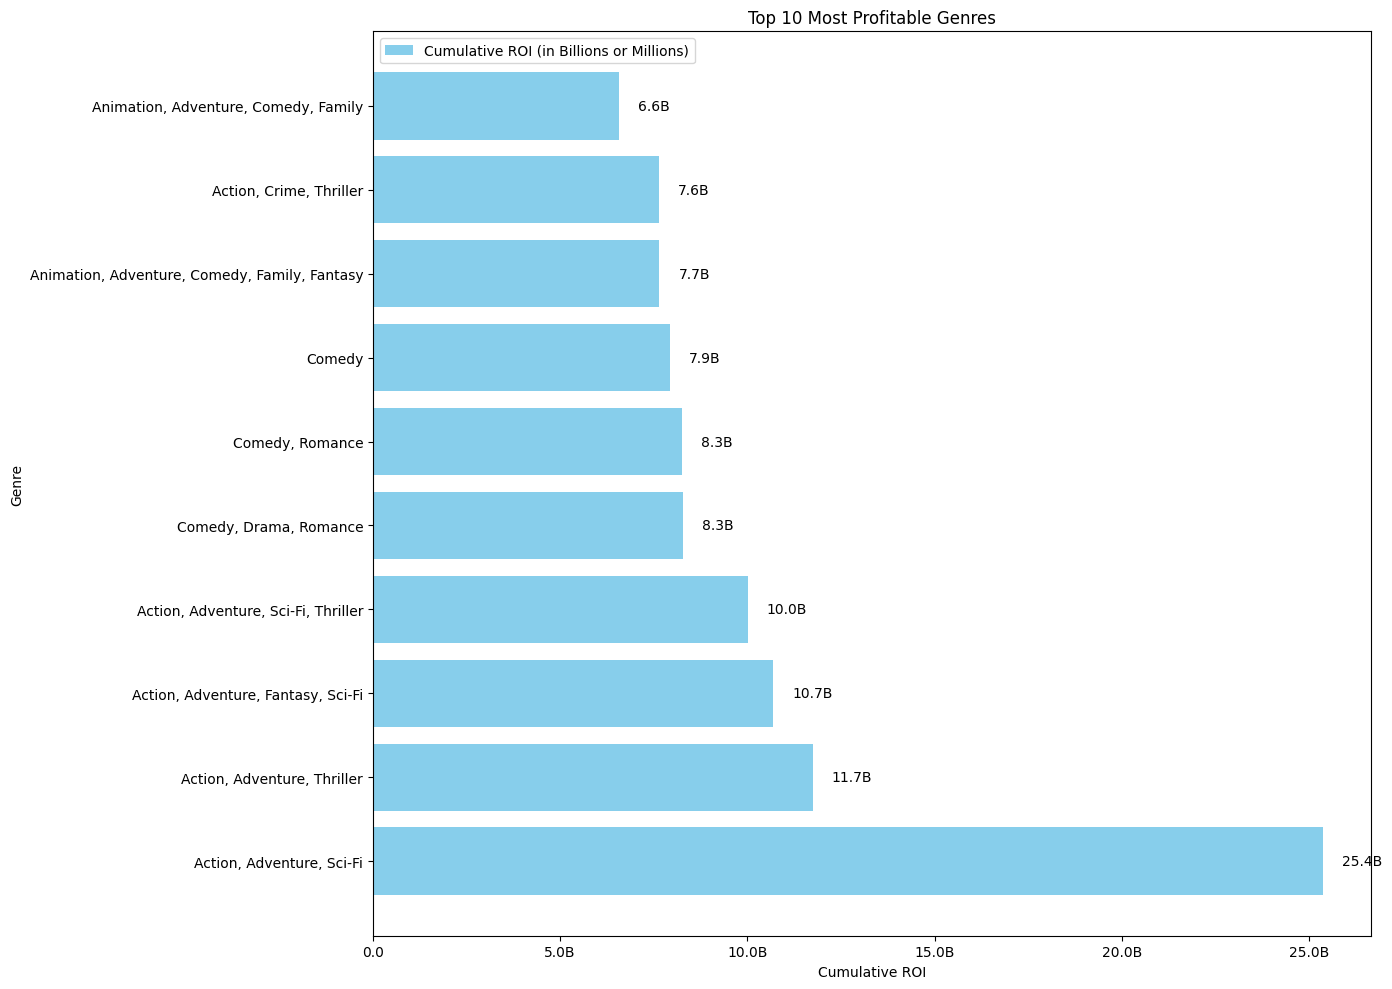

In [645]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Select the top 10 ROI values
top_roi_values = top_10_profitable_genres['cumulative_roi'].tolist()

# Select the top 10 Genres
top_roi_genres = top_10_profitable_genres['Genre'].tolist()

def format_yticks(x, _):
    """Format the y-axis ticks based on whether the value is in millions or billions."""
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x:.1f}'

# Plot the horizontal bar chart
plt.figure(figsize=(14, 10))
bars = plt.barh(top_roi_genres, top_roi_values, color='skyblue')

# Format x-axis to be more readable
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))

# Add data labels on the bars
for bar in bars:
    width = bar.get_width()
    if width >= 1e9:
        label = f'{width/1e9:.1f}B'
    elif width >= 1e6:
        label = f'{width/1e6:.1f}M'
    else:
        label = f'{width:.1f}'
    plt.text(width + 0.02 * max(top_roi_values), bar.get_y() + bar.get_height()/2,
             label, va='center', ha='left')

# Add labels and title
plt.ylabel('Genre')
plt.xlabel('Cumulative ROI')
plt.title('Top 10 Most Profitable Genres')

# Add legend to show units
plt.legend(['Cumulative ROI (in Billions or Millions)'], loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


# Observation 
- Action, Adventure and Sci-fi is the most profitable genre combination in terms of return on investment at 25Billion ROI followed by Action, Adventure, Thriller at 11 Billion ROI and then comes Action, Adventure, Fantasy, Sci-Fi at 10.7Billion

#### A correlation between average rating and Return On Investment(ROI)

Are movie genres with higher average ratings more profitable?

In [646]:

# For average ratings
genre_average_ratings = tmdb_genre_aggs
# Standardize the label of the genre column
imdb_basics_plus_ratings_df.rename(columns={'genres':'genre'}, inplace=True)
genre_average_ratings = imdb_basics_plus_ratings_df.groupby('genre').agg(
    avg_rating = ('averagerating','mean'),
    movie_count2 = ('primary_title','count')
).reset_index()

sorted_g = genre_average_ratings.sort_values(by='avg_rating', ascending=False,  )
display(imdb_basics_plus_ratings_df)

# For ROI
# Standardize the label of the ROI column
genre_roi_df.rename(columns={'Genre':'genre'}, inplace=True)
display(genre_roi_df)

#merge the two dataframes
roi_and_average_rating_df = pd.merge(sorted_g, genre_roi_df, on='genre', how='inner')
display(roi_and_average_rating_df)

,movie_id,primary_title,start_year,runtime_minutes,genre,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,2018,97.00,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...,...
73038,tt9913056,Swarm Season,2019,86.00,Documentary,6.20,5
73039,tt9913084,Diabolik sono io,2019,75.00,Documentary,6.20,6
73040,tt9914286,Sokagin Çocuklari,2019,98.00,"Drama,Family",8.70,136
73041,tt9914642,Albatross,2017,74.66,Documentary,8.50,8


,genre,cumulative_roi,movie_count
0,Action,12068436.00,7
1,"Action, Adventure",1909734717.00,7
2,"Action, Adventure, Biography, Drama, History",-10306691.00,1
3,"Action, Adventure, Biography, Drama, Romance",48000000.00,1
4,"Action, Adventure, Biography, Drama, Romance, ...",22897191.00,1
...,...,...,...
1064,"Short, News",-25995000.00,1
1065,"Short, Western",378425.00,1
1066,Talk-Show,358115018.00,7
1067,Thriller,5062560.00,16


,genre,avg_rating,movie_count2,cumulative_roi,movie_count
0,Music,7.62,176,-8917094.00,1
1,Documentary,7.29,10313,398272120.00,50
2,Biography,6.86,163,-11074231.00,1
3,Musical,6.74,132,-5068194.00,1
4,History,6.61,106,-23708888.00,3
5,Drama,6.49,11612,3702016260.00,228
6,Adventure,6.27,176,910993476.00,4
7,Fantasy,6.20,147,3012862.00,1
8,Family,6.08,491,277626753.00,5
9,Romance,6.05,717,16735950.00,5


## Observation 
- A movie genre can have a high avg rating, but a low or negative cumulative return on investment eg music genre with an average rating of 7.62 but got a loss on investment of 8 Million Dollars , similarly , a movie can have a low average rating but a high return on investment for example the Horror genre has an average rating of 4.84 but a cumulative return on investment of 1 Billion Dollars.

# Average Movie Length in the Drama genre

For the purposes of this analysis , the genre criteria that has been used to pick the most popular movie is the sum of vote count from the tmdb database as sum of vote count gives a clear indication of the amount of people that have been reached by the movies.

In [647]:
# Filter the movies in the drama genre
drama_movies = imdb_basics_plus_ratings_df['genre'] == 'Drama'

# Create the drama movies dataset with only primary_title and runtime_minutes columns
drama_movies_df = imdb_basics_plus_ratings_df.loc[drama_movies, ['primary_title', 'genre','runtime_minutes']]

# Display the drama_movies_df
display(drama_movies_df)

# Display the longest movie 
print("Movie with longest runtime")
display(drama_movies_df.max())

# Display the shortes movie time
print("Movie with shortest runtime")
display(drama_movies_df.min())

,primary_title,genre,runtime_minutes
2,The Other Side of the Wind,Drama,122.00
7,Pál Adrienn,Drama,136.00
10,Children of the Green Dragon,Drama,89.00
13,Heaven & Hell,Drama,104.00
14,The Final Journey,Drama,120.00
...,...,...,...
73005,Turned Out,Drama,131.00
73022,Hansa Ek Sanyog,Drama,135.00
73029,Ottam,Drama,120.00
73030,Pengalila,Drama,111.00


Movie with longest runtime


primary_title      ärtico
genre               Drama
runtime_minutes   1440.00
dtype: object

Movie with shortest runtime


primary_title      #BKKY
genre              Drama
runtime_minutes     9.00
dtype: object

In [648]:
# Aggregate the average runtime minutes for the drama genre

mean_runtime_minutes = drama_movies_df['runtime_minutes'].mean()

print(f"The mean runtime minutes for movies in the drama movie genre is {mean_runtime_minutes:.2f} Minutes ")

The mean runtime minutes for movies in the drama movie genre is 97.30 Minutes 


#### Visualize the runtime minutes of the movies in the drama genre.

In [649]:
# A box plot to visualize the runtime minutes in the Drama Genre. 
data = drama_movies_df['runtime_minutes']

# Create a plot using plotly
fig = px.box(drama_movies_df, y='runtime_minutes', 
             title='Box Plot of Runtime Minutes',
             labels={'runtime_minutes': 'Runtime (Minutes)'},
             template='plotly_white') 
fig.show()

#### b) Popularity based on popularity index

(Using TMDB database)

#### Obseration: Most movies in the drama genre fall between 87 minutes and 105 minutes, which are the lower quartile and the upper quartile respectively.

# Top Grossing Movies in the Drama Genre

In [658]:
# Filter Top grossing movies in the drama genre. 
drama_movies_gross_df = updated_tn_df['Genre'] == 'Drama'

# Create the drama movies dataset with only primary_title and runtime_minutes columns
drama_movies_df = updated_tn_df.loc[drama_movies_gross_df, ['movie' ,'Formatted ROI','ROI','release_date']]

# Top 10 Grossing movies the drama genre. 
top_10_drama_movies = drama_movies_df.sort_values(by='ROI', ascending=False, ignore_index=True).head(10)

display(top_10_drama_movies)


,movie,Formatted ROI,ROI,release_date
0,The Passion of the Christ,"597,341,924",597341924.00,2004-02-25
1,Rain Man,"387,800,000",387800000.00,1988-12-16
2,American Beauty,"341,258,047",341258047.00,1999-09-15
3,Gran Torino,"249,543,085",249543085.00,2008-12-12
4,The Help,"188,120,004",188120004.00,2011-08-10
5,The Queen,"113,885,873",113885873.00,2006-09-30
6,Babel,"112,121,212",112121212.00,2006-10-27
7,One Flew Over the Cuckoo's Nest,"104,597,629",104597629.00,1975-11-19
8,The Devil Inside,"100,759,490",100759490.00,2012-01-06
9,Crash,"93,869,956",93869956.00,2005-05-06


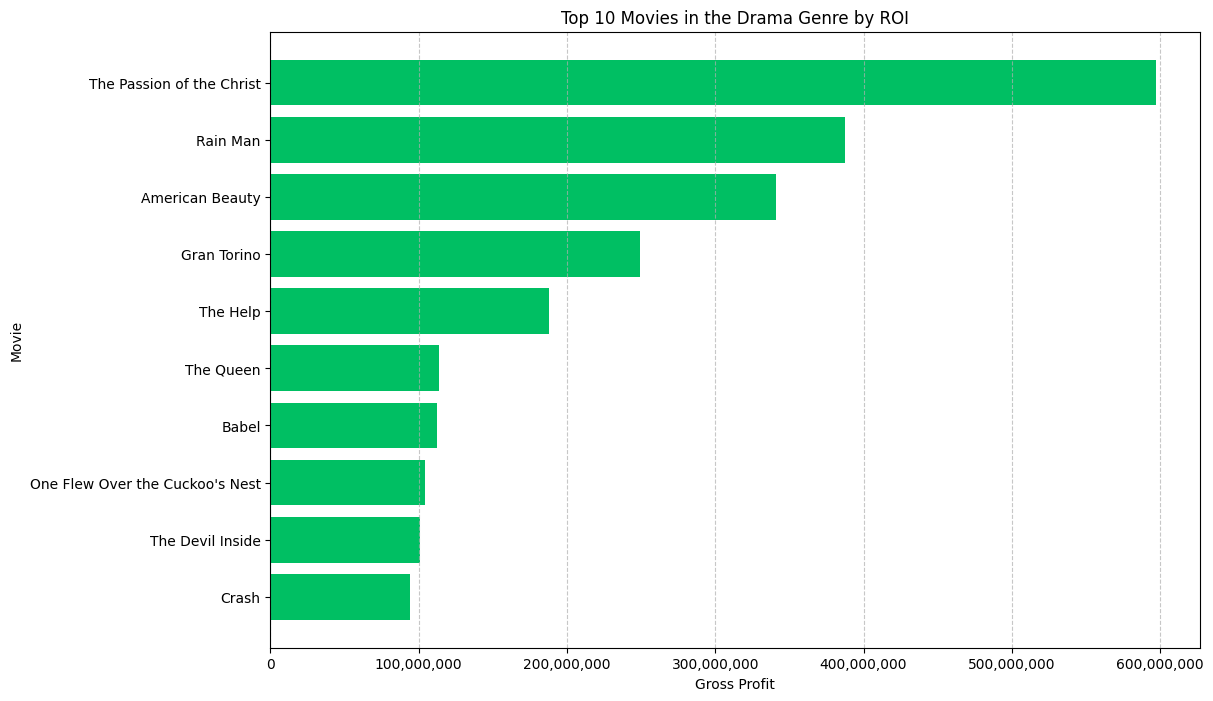

In [663]:
# Bar Graph Visualization of the top 10 movies in the drama genre
plt.figure(figsize=(12, 8))
plt.barh(top_10_drama_movies['movie'], top_10_drama_movies['ROI'], color='#00bf63')

# Format x-axis numbers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(int(x))))

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlabel('Gross Profit')
plt.ylabel('Movie')
plt.title('Top 10 Movies in the Drama Genre by ROI')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ROI on top
plt.show()

### Visualization a word cloud to display the top 10 movies in the drama genre

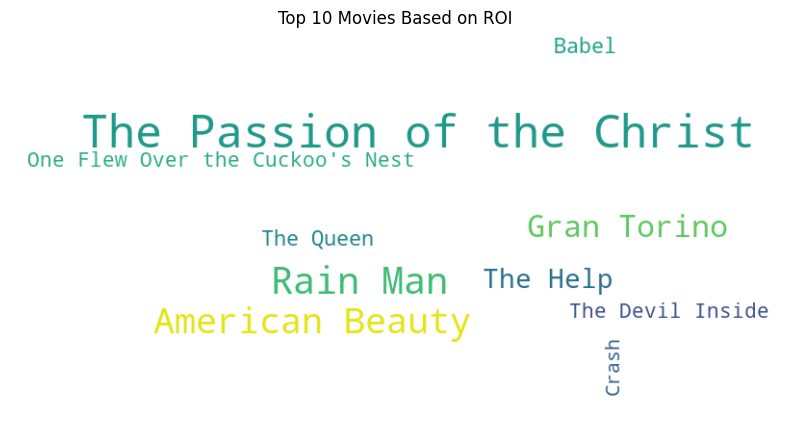

In [655]:
 # Create a dictionary for the word cloud where titles are the keys and ROI's are the values
wordcloud_data = {row['Title']: row['ROI'] for _, row in top_10_drama_movies.iterrows()}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Movies Based on ROI')
plt.show()


#### As depicted in the tables above the Passion of Christ has the highest gross income as per our dataset , thus it is the largest in size in the wordcloud pictured above.

# Conclusions 

As Elimu Kwa Wote transitions into the movie industry scene, they can take these three recommendations into consideration to guide them in making movies that will shake the movie industry for God's glory. 

- EKW should focus on producing movies in the Drama Genre category. This is because, from the analysis done, it was found that Drama movies have the highest number of viewers as seen from the cumulative vote count of more than 23 Million.

- EKW should focus on making movies in the drama genre whose length are between 85 minutes and 105 minutes long so as to hold the audience's attention throughout the duration of the movie. 

- EKW should study the movies The Passion of Christ , Rain Man, and American Beauty among others so as to as to identify any and leverage the plot and cinematic techniques that have been used and apply them to their movies so as to enhance their quality, thus increasing their appeal and marketability in their quest to leave an impact in the lives of as many people as possible.  
Furthermore, as movies are often a staged depiction of reality, the study of these movies will seek to undestand the major life issues present in them and seek to address them in the drama's that will be produced by the Elimu Kwa Wote movie studio.

# Next Steps

The following objectives are next in line to be analysed by the Elimu Kwa Wote movie committee. 

- Determine the factors that are taken into consideration when preparing the budget for a successful movie. 

- Determine the marketing strategies used to promote the uptake of top  movies.